In [3]:
import numpy as np
from scipy.stats import norm
from scipy.stats import multivariate_normal as mvn
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats

Monte Carlo: estimate = 1.6449214258260145, variance = 4.156833839241975
Importance Sampling: estimate = 1.6487212707001286, variance = 3.0118216323272467e-31


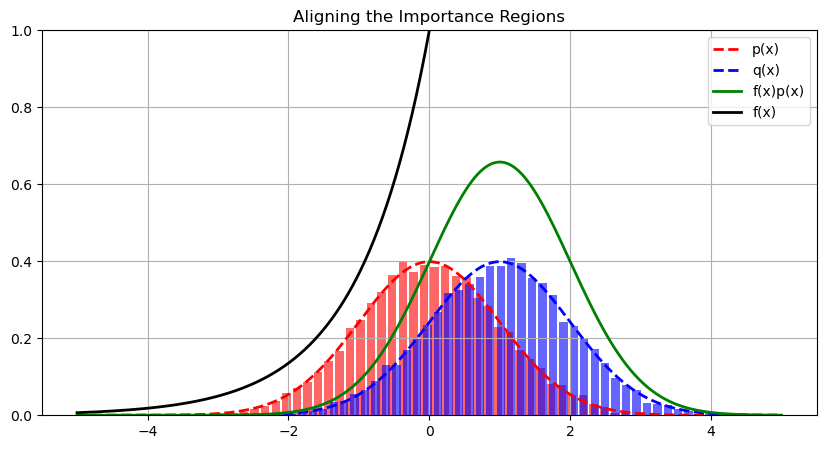

In [264]:
# Define the target and proposal distributions
p_x = stats.norm(0, 1)  # Target distribution is N(0, 1)
q_x = stats.norm(1, 1)  # Proposal distribution is N(1, 1)

# Define the function of interest
f = lambda x: np.exp(x)

# Sample size
n = 10000

# Simple Monte Carlo: sample from p_x
samples_p = p_x.rvs(n)
values_p = f(samples_p)
mc_estimate = values_p.mean()
mc_variance = values_p.var()
print(f"Monte Carlo: estimate = {mc_estimate}, variance = {mc_variance}")

# Importance sampling: sample from q_x
samples_q = q_x.rvs(n)
weights = p_x.pdf(samples_q) / q_x.pdf(samples_q)
values_q = f(samples_q) * weights
is_estimate = values_q.mean()
is_variance = values_q.var()
print(f"Importance Sampling: estimate = {is_estimate}, variance = {is_variance}")

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
x = np.linspace(-5, 5, 1000)

ax.plot(x, p_x.pdf(x), label='p(x)', color='red', linestyle='--', linewidth=2)
ax.hist(samples_p, bins=50, density=True, color='red', alpha=0.60, rwidth=0.8)

ax.plot(x, q_x.pdf(x), label='q(x)', color='blue', linestyle='--', linewidth=2)
ax.hist(samples_q, bins=50, density=True, color='blue', alpha=0.60, rwidth=0.8)

ax.plot(x, f(x) * p_x.pdf(x), label='f(x)p(x)', color='green', linestyle='-', linewidth=2)
ax.plot(x, f(x), label='f(x)', color='black',linewidth=2)
ax.set_title('Aligning the Importance Regions')
ax.legend()
ax.grid()
ax.set_ylim(0, 1)
plt.show()

Analytical: estimate = 0.1018502948
Monte Carlo: estimate = 0.13729811498446687, variance = 0.032209917521546276
Importance Sampling: estimate = 0.10163719043445489, variance = 0.006177153907410279


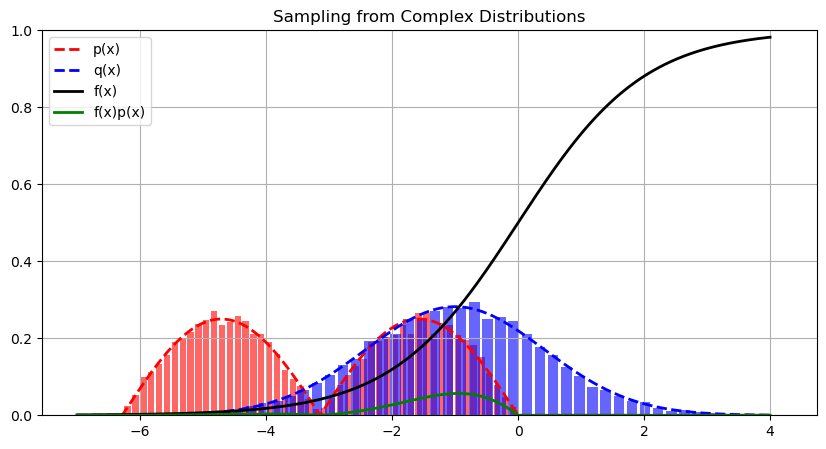

In [261]:
def p(x):
    mask = (x >= -2*np.pi) & (x <= 0)
    return np.abs(np.sin(x)) / 4 * mask

def p_rvs(n):
    samples = []
    while len(samples) < n:
        # Generate a candidate from a proposal distribution, here uniform(-2pi, 0)
        x = np.random.uniform(-2*np.pi, 0)
        # Generate a uniform random number from 0 to the maximum value of the p(x)
        y = np.random.uniform(0, 0.5)
        
        # Accept the candidate with probability proportional to the target density
        if y < p(x):
            samples.append(x)
            
    return np.array(samples)

def f(x):
    return 1/(1 + np.exp(-x))

q = mvn(-1, 2)

# Sample size
n = 10000

print(f"Analytical: estimate = 0.1018502948")

# Simple Monte Carlo: sample from p_x
samples_p = p_rvs(n)
values_p = f_x(samples_p)
mc_estimate = values_p.mean()
mc_variance = values_p.var()
print(f"Monte Carlo: estimate = {mc_estimate}, variance = {mc_variance}")

# Importance sampling: sample from q_x
samples_q = q.rvs(n)
weights = p(samples_q) / q.pdf(samples_q)
values_q = f(samples_q) * weights
is_estimate = values_q.mean()
is_variance = values_q.var()

print(f"Importance Sampling: estimate = {is_estimate}, variance = {is_variance}")

x = np.linspace(-7, 4, 10000)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(x, p(x), label='p(x)', color='red', linestyle='--', linewidth=2)
ax.hist(samples_p, bins=50, density=True, color='red', alpha=0.60, rwidth=0.8)

ax.plot(x, q.pdf(x), label='q(x)', color='blue', linestyle='--', linewidth=2)
ax.hist(samples_q, bins=50, density=True, color='blue', alpha=0.60, rwidth=0.8)

ax.plot(x, f(x), label='f(x)', color='black',linewidth=2)
ax.plot(x, p(x) * f(x), label='f(x)p(x)', color='green', linestyle='-', linewidth=2)

ax.set_title('Sampling from Complex Distributions')
ax.grid()
ax.legend()
ax.set_ylim(0, 1)
plt.show()